# Time series decomposition of the data cube

In [1]:
using CABLAB
import Patchwork
Patchwork.load_js_runtime()

In [3]:
c             = Cube("/home/jovyan/work/datacube/cablab-datacube-0.2.2/low-res/")
vars          = "net_ecosystem_exchange";
cdata         = getCubeData(c,latitude=(30,65), longitude=(-10,40),variable=vars); 

We want to decompose the time series into a signals of Trend, Seasonal cycle, low-frequency variations and high-frequency variantions. Here we use a Fourier-based approach by calling **filterTSFFT**. Before doing so, we need to do some gapFilling

In [4]:
cube_filled=mapCube(gapFillMSC,cdata);

In [5]:
xout=mapCube(filterTSFFT,cube_filled)

Temporary Data Cube with the following dimensions
Time                Axis with 506 Elements from 2001-01-01T00:00:00 to 2011-12-27T00:00:00
TimeScale           Axis with elements: Trend Long-Term Variability Annual Cycle Fast Oscillations 
Lon                 Axis with 200 Elements from -10.0 to 39.75
Lat                 Axis with 140 Elements from 65.0 to 30.25


And we can plot the resulting decomposed time series

In [13]:
plotXY(xout,xaxis=TimeAxis,group="timescale",lon=35,lat=50.5)

In [7]:
variance=reduceCube(var, xout, TimeAxis, no_ocean=true);

Let's look at a map of the variability in the Trend signal to see where trends in net ecosystem exchange are strongest.

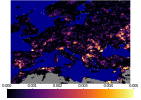

In [19]:
plotMAP(variance,timescale=1,dmax=0.005)

One can also check which areas have the strongest variance in the seasonal cycle

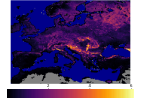

In [20]:
plotMAP(variance,timescale=3)